# Spam Email Detection

Tutorial Link: https://www.kaggle.com/code/mfaisalqureshi/email-spam-detection-98-accuracy 

#### 1. Data Acquisition

In [1]:
# spare cell to install necessary packages
%pip install nltk



     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     -------------------------------------  41.0/42.0 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 689.8 kB/s eta 0:00:00
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB 1.9 MB/s eta 0:00:01
   -- ------------------------------------- 0.1/1.5 MB 1.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.5 MB 1.2 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 1.1 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.5 MB 1.2 MB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.5 MB 1.3 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.5 MB 1.3 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.5 MB 1.3 MB/s eta 0:00:01
   ------------ -------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [31]:
# import necessary libraries

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

import re
import nltk
from nltk.stem import WordNetLemmatizer



In [32]:
# load dataset

data = pd.read_csv('/Users/mohana.selvakumar/Downloads/spam-email-detection/spam.csv')

data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [33]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### 2. Data Preprocessing

In [35]:
# count null columns

data.isna().sum()

Category    0
Message     0
dtype: int64

In [36]:
# label spam data

data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)
data.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [37]:
# convert all text to lowercase for consistency

data['Message'] = data['Message'].str.lower()

In [38]:
# remove punctuation to reduce noise

data['Message'] = data['Message'].str.replace('[^\w\s]', '')

<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
C:\Users\mohana.selvakumar\AppData\Local\Temp\ipykernel_13916\1495028139.py:3: SyntaxWarning: invalid escape sequence '\w'
  data['Message'] = data['Message'].str.replace('[^\w\s]', '')


In [39]:
# lemmatization

# ensure you have the necessary resources
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
data['Message'] = data['Message'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mohana.selvakumar\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mohana.selvakumar\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package omw-1.4 is already up-to-date!


#### 3. Model Development

In [40]:
# split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(data.Message, data.Spam, test_size=0.25, random_state=42)

In [41]:
# transform the text data into a numerical format using TF-IDF Vectorizer

# remove common stop words

# vectorizer = TfidfVectorizer(stop_words='english')

# X_train_tfidf = vectorizer.fit_transform(X_train)
# X_test_tfidf = vectorizer.transform(X_test)


In [42]:
# train the naive bayes classifier model

model = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

# model = MultinomialNB()
model.fit(X_train, y_train) # X_train_tfidf

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

#### 4. Model Evaluation

In [44]:
# evaluate the model

y_pred = model.predict(X_test) # X_test_tfidf
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9870782483847811
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1207
           1       0.97      0.93      0.95       186

    accuracy                           0.99      1393
   macro avg       0.98      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393

Confusion Matrix:
 [[1202    5]
 [  13  173]]


#### 5. Prediction

In [47]:
# example new messages to classify
new_messages = [
    "Congratulations! You've won a free ticket to the Bahamas. Call now to claim.",
    "Hey, are we still on for dinner tonight?",
    "Earn money from home without any effort!", 
    "Sounds great! Are you home now?",
    "Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES"
]

In [48]:
# preprocess the new messages

def preprocess_message(message):
    message = message.lower()
    message = re.sub(r'[^\w\s]', '', message)

    lemmatizer = WordNetLemmatizer()
    message = ' '.join([lemmatizer.lemmatize(word) for word in message.split()])
    return message

preprocessed_messages = [preprocess_message(msg) for msg in new_messages]

In [49]:
# predict using the trained model
predictions = model.predict(new_messages)

# output of predictions
for message, prediction in zip(new_messages, predictions):
    print(f"Message: {message}")
    print(f"Prediction: {'Spam' if prediction == 1 else 'Ham'}")
    print()

Message: Congratulations! You've won a free ticket to the Bahamas. Call now to claim.
Prediction: Spam

Message: Hey, are we still on for dinner tonight?
Prediction: Ham

Message: Earn money from home without any effort!
Prediction: Ham

Message: Sounds great! Are you home now?
Prediction: Ham

Message: Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES
Prediction: Spam



#### Some Visualisations

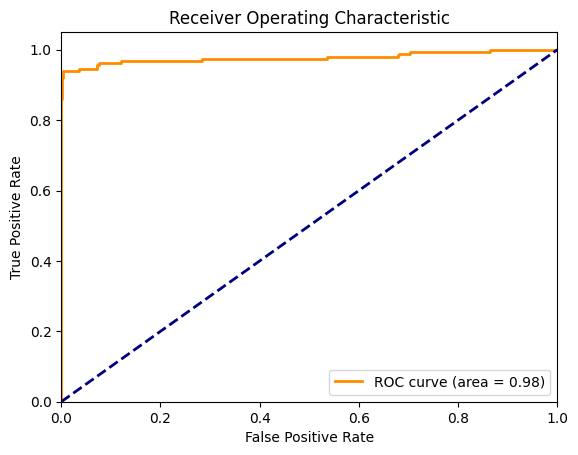

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
